# INTRODUCTION

### This project involves analyzing historical loan application data to build a predictive model that determines whether a loan should be approved or denied. By leveraging key applicant features and machine learning algorithms, the goal is to support data-driven decision-making in the loan approval process.

### We begin by importing the necessary packages needed to build the model and reading the dataset into pandas

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
df = pd.read_csv('loan_application_data.csv')

In [5]:
df.head()

,ApplicationDate,CreditScore,AnnualIncome,LoanAmount,EmploymentStatus,OutstandingDebt,EmploymentStartDate,LoanOutcome
0,2021-01-01 00:00:00.000000000,655,6306291,417034,Employed,159749,2011-11-24 19:42:42.126610048,Denied
1,2021-01-02 02:16:56.216216216,652,7555169,5730135,Self-Employed,334035,2006-12-25 19:23:45.596053728,Approved
2,2021-01-03 04:33:52.432432432,490,9578220,1886511,Unemployed,159927,2006-05-06 00:34:43.639353248,Approved
3,2021-01-04 06:50:48.648648648,759,7697704,9468833,Unemployed,3438,2009-01-22 19:20:12.496574400,Denied
4,2021-01-05 09:07:44.864864864,800,9040140,655286,Self-Employed,110166,2005-10-19 11:13:37.867909024,Approved


##  Quality checks

In [9]:
df.shape

(1000, 8)

In [7]:
df.isna().sum()

ApplicationDate        0
CreditScore            0
AnnualIncome           0
LoanAmount             0
EmploymentStatus       0
OutstandingDebt        0
EmploymentStartDate    0
LoanOutcome            0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df.dtypes

ApplicationDate        object
CreditScore             int64
AnnualIncome            int64
LoanAmount              int64
EmploymentStatus       object
OutstandingDebt         int64
EmploymentStartDate    object
LoanOutcome            object
dtype: object

In [17]:
df.nunique()

ApplicationDate        1000
CreditScore             467
AnnualIncome           1000
LoanAmount             1000
EmploymentStatus          3
OutstandingDebt         997
EmploymentStartDate     873
LoanOutcome               2
dtype: int64

In [19]:
df.describe()

,CreditScore,AnnualIncome,LoanAmount,OutstandingDebt
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,576.893000,9.111708e+06,5.129975e+06,256927.025000
std,160.641262,3.461877e+06,2.891096e+06,143362.249257
min,301.000000,3.019496e+06,9.348400e+04,72.000000
25%,434.000000,6.284852e+06,2.609138e+06,137270.500000
50%,580.500000,9.227958e+06,5.359583e+06,263305.500000
75%,714.000000,1.208609e+07,7.652186e+06,383105.250000
max,849.000000,1.495861e+07,9.974945e+06,499735.000000


In [21]:
df.head()

,ApplicationDate,CreditScore,AnnualIncome,LoanAmount,EmploymentStatus,OutstandingDebt,EmploymentStartDate,LoanOutcome
0,2021-01-01 00:00:00.000000000,655,6306291,417034,Employed,159749,2011-11-24 19:42:42.126610048,Denied
1,2021-01-02 02:16:56.216216216,652,7555169,5730135,Self-Employed,334035,2006-12-25 19:23:45.596053728,Approved
2,2021-01-03 04:33:52.432432432,490,9578220,1886511,Unemployed,159927,2006-05-06 00:34:43.639353248,Approved
3,2021-01-04 06:50:48.648648648,759,7697704,9468833,Unemployed,3438,2009-01-22 19:20:12.496574400,Denied
4,2021-01-05 09:07:44.864864864,800,9040140,655286,Self-Employed,110166,2005-10-19 11:13:37.867909024,Approved


### Modifying the datetime columns and separating them into individual date and time columns

In [25]:
# Convert to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])

# Separate into date and time
df['Appdate'] = df['ApplicationDate'].dt.date
df['Apptime'] = df['ApplicationDate'].dt.time



In [29]:
# Convert to datetime
df['EmploymentStartDate'] = pd.to_datetime(df['EmploymentStartDate'])

# Separate into date and time
df['Empdate'] = df['EmploymentStartDate'].dt.date
df['Emptime'] = df['EmploymentStartDate'].dt.time


In [31]:
df.head()

,ApplicationDate,CreditScore,AnnualIncome,LoanAmount,EmploymentStatus,OutstandingDebt,EmploymentStartDate,LoanOutcome,Appdate,Apptime,Empdate,Emptime
0,2021-01-01 00:00:00.000000000,655,6306291,417034,Employed,159749,2011-11-24 19:42:42.126610048,Denied,2021-01-01,00:00:00,2011-11-24,19:42:42.126610
1,2021-01-02 02:16:56.216216216,652,7555169,5730135,Self-Employed,334035,2006-12-25 19:23:45.596053728,Approved,2021-01-02,02:16:56.216216,2006-12-25,19:23:45.596053
2,2021-01-03 04:33:52.432432432,490,9578220,1886511,Unemployed,159927,2006-05-06 00:34:43.639353248,Approved,2021-01-03,04:33:52.432432,2006-05-06,00:34:43.639353
3,2021-01-04 06:50:48.648648648,759,7697704,9468833,Unemployed,3438,2009-01-22 19:20:12.496574400,Denied,2021-01-04,06:50:48.648648,2009-01-22,19:20:12.496574
4,2021-01-05 09:07:44.864864864,800,9040140,655286,Self-Employed,110166,2005-10-19 11:13:37.867909024,Approved,2021-01-05,09:07:44.864864,2005-10-19,11:13:37.867909


# Feature Engineering

### creating columns to find the work experience of applicants in Months and Years counts

In [47]:
from datetime import datetime

# Convert columns to datetime
df['Appdate'] = pd.to_datetime(df['Appdate'])
df['Empdate'] = pd.to_datetime(df['Empdate'])

# Calculate month difference
df['months_count'] = (df['Appdate'].dt.year - df['Empdate'].dt.year) * 12 + \
                     (df['Appdate'].dt.month - df['Empdate'].dt.month)

In [53]:
from datetime import datetime

# Convert columns to datetime
df['Appdate'] = pd.to_datetime(df['Appdate'])
df['Empdate'] = pd.to_datetime(df['Empdate'])

# Calculate years difference
df['YearsExp'] = df['Appdate'].dt.year - df['Empdate'].dt.year
                    

In [55]:
df.head()

,ApplicationDate,CreditScore,AnnualIncome,LoanAmount,EmploymentStatus,OutstandingDebt,EmploymentStartDate,LoanOutcome,Appdate,Apptime,Empdate,Emptime,months_count,YearsExp
0,2021-01-01 00:00:00.000000000,655,6306291,417034,Employed,159749,2011-11-24 19:42:42.126610048,Denied,2021-01-01,00:00:00,2011-11-24,19:42:42.126610,110,10
1,2021-01-02 02:16:56.216216216,652,7555169,5730135,Self-Employed,334035,2006-12-25 19:23:45.596053728,Approved,2021-01-02,02:16:56.216216,2006-12-25,19:23:45.596053,169,15
2,2021-01-03 04:33:52.432432432,490,9578220,1886511,Unemployed,159927,2006-05-06 00:34:43.639353248,Approved,2021-01-03,04:33:52.432432,2006-05-06,00:34:43.639353,176,15
3,2021-01-04 06:50:48.648648648,759,7697704,9468833,Unemployed,3438,2009-01-22 19:20:12.496574400,Denied,2021-01-04,06:50:48.648648,2009-01-22,19:20:12.496574,144,12
4,2021-01-05 09:07:44.864864864,800,9040140,655286,Self-Employed,110166,2005-10-19 11:13:37.867909024,Approved,2021-01-05,09:07:44.864864,2005-10-19,11:13:37.867909,183,16


### Creating columns to find the Debt-to-income ratio and Loan-to-income ratio

In [57]:
# DTI
df['Debt-to-income'] = df['OutstandingDebt'] / df['AnnualIncome']

In [59]:
# LTI
df['Loan-to-income'] = df['LoanAmount'] / df['AnnualIncome']

In [61]:
df.head()

,ApplicationDate,CreditScore,AnnualIncome,LoanAmount,EmploymentStatus,OutstandingDebt,EmploymentStartDate,LoanOutcome,Appdate,Apptime,Empdate,Emptime,months_count,YearsExp,Debt-to-income,Loan-to-income
0,2021-01-01 00:00:00.000000000,655,6306291,417034,Employed,159749,2011-11-24 19:42:42.126610048,Denied,2021-01-01,00:00:00,2011-11-24,19:42:42.126610,110,10,0.025332,0.066130
1,2021-01-02 02:16:56.216216216,652,7555169,5730135,Self-Employed,334035,2006-12-25 19:23:45.596053728,Approved,2021-01-02,02:16:56.216216,2006-12-25,19:23:45.596053,169,15,0.044213,0.758439
2,2021-01-03 04:33:52.432432432,490,9578220,1886511,Unemployed,159927,2006-05-06 00:34:43.639353248,Approved,2021-01-03,04:33:52.432432,2006-05-06,00:34:43.639353,176,15,0.016697,0.196958
3,2021-01-04 06:50:48.648648648,759,7697704,9468833,Unemployed,3438,2009-01-22 19:20:12.496574400,Denied,2021-01-04,06:50:48.648648,2009-01-22,19:20:12.496574,144,12,0.000447,1.230085
4,2021-01-05 09:07:44.864864864,800,9040140,655286,Self-Employed,110166,2005-10-19 11:13:37.867909024,Approved,2021-01-05,09:07:44.864864,2005-10-19,11:13:37.867909,183,16,0.012186,0.072486


### Displaying the distribution of loan outcomes (approved vs Denied)

<Axes: ylabel='count'>

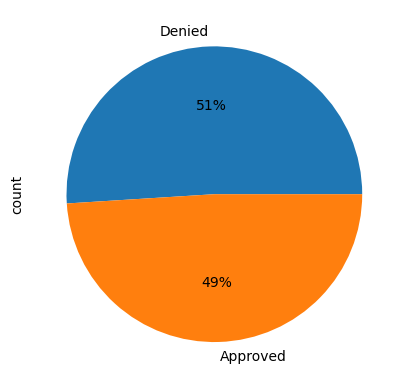

In [63]:
df['LoanOutcome'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

### Selecting the features needed for the model building

In [89]:
df1 = df.drop(['ApplicationDate','EmploymentStartDate','Appdate','Apptime','Empdate','Emptime',], axis=1)

In [79]:
df1.head()

,CreditScore,AnnualIncome,LoanAmount,EmploymentStatus,OutstandingDebt,LoanOutcome,months_count,YearsExp,Debt-to-income,Loan-to-income
0,655,6306291,417034,Employed,159749,0,110,10,0.025332,0.066130
1,652,7555169,5730135,Self-Employed,334035,1,169,15,0.044213,0.758439
2,490,9578220,1886511,Unemployed,159927,1,176,15,0.016697,0.196958
3,759,7697704,9468833,Unemployed,3438,0,144,12,0.000447,1.230085
4,800,9040140,655286,Self-Employed,110166,1,183,16,0.012186,0.072486


### Perfoming Label encoding for the text data columns to transform them to numerical data

In [91]:
df1['LoanOutcome'] = df1['LoanOutcome'].map({'Approved': 1, 'Denied': 0})

In [93]:
# Label Encoding for EmploymentStatus column
dummies = pd.get_dummies(df1['EmploymentStatus'], drop_first=True)

dummies = dummies.astype(int)

df1 = pd.concat([df1.drop('EmploymentStatus', axis=1), dummies], axis=1)

In [95]:
df1.head()

,CreditScore,AnnualIncome,LoanAmount,OutstandingDebt,LoanOutcome,months_count,YearsExp,Debt-to-income,Loan-to-income,Self-Employed,Unemployed
0,655,6306291,417034,159749,0,110,10,0.025332,0.066130,0,0
1,652,7555169,5730135,334035,1,169,15,0.044213,0.758439,1,0
2,490,9578220,1886511,159927,1,176,15,0.016697,0.196958,0,1
3,759,7697704,9468833,3438,0,144,12,0.000447,1.230085,0,1
4,800,9040140,655286,110166,1,183,16,0.012186,0.072486,1,0


# Feature Correlation

### Checking the correlation of the features with the target variable (Loan outcome)

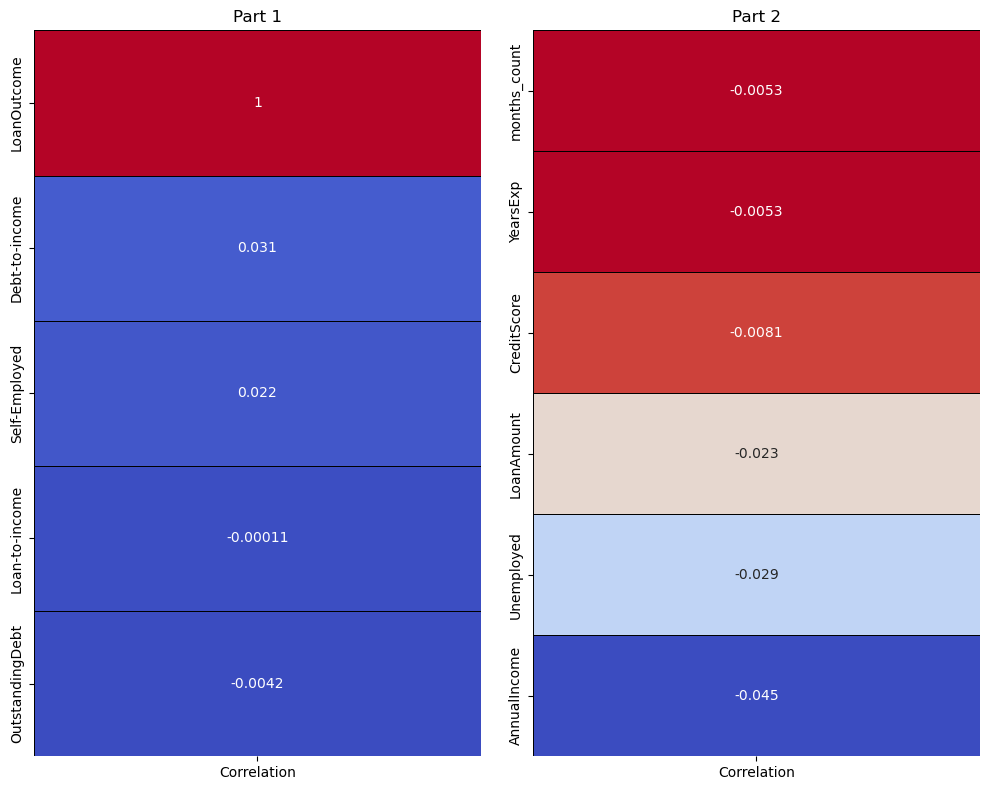

In [97]:
corr = df1.corrwith(df1['LoanOutcome']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlation']

colors = 'coolwarm'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.heatmap(corr.iloc[:5, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False)
plt.title('Part 1')

plt.subplot(1, 2, 2)
sns.heatmap(corr.iloc[5:11, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False)
plt.title('Part 2')

fig.tight_layout(w_pad=2)
plt.show()

### Checking the features with noticeable outliers

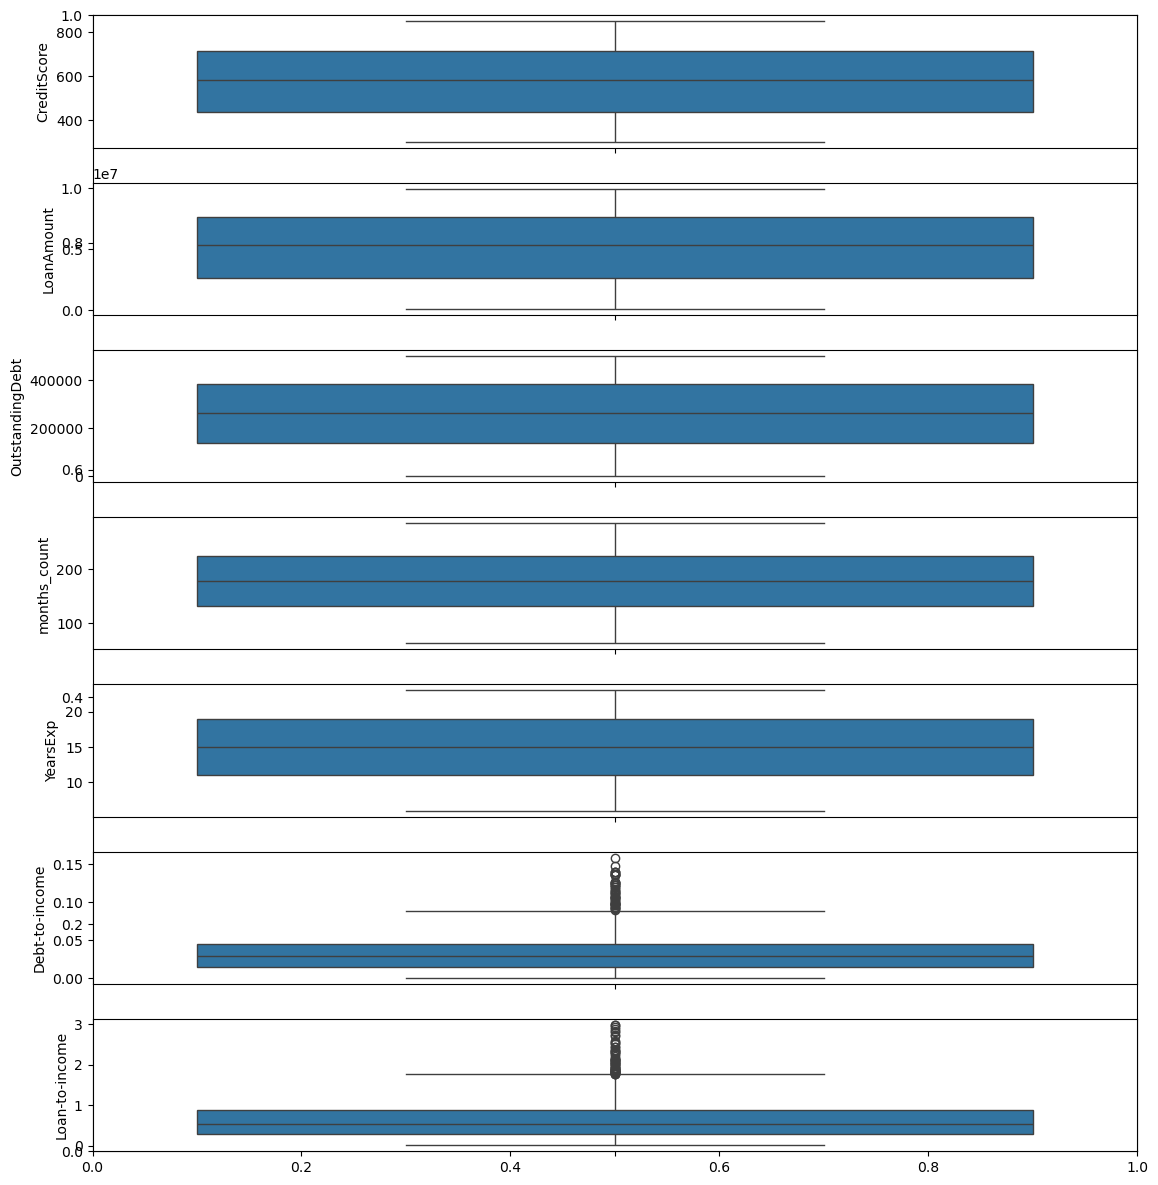

In [101]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(df1[['CreditScore','LoanAmount','OutstandingDebt','months_count','YearsExp','Debt-to-income','Loan-to-income']].columns):
    plt.subplot(7, 1, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df[feature])
    plt.tight_layout()

### defining the x and y variables

In [103]:
x = df1.drop('LoanOutcome', axis = 1)
y = df1['LoanOutcome']

### Transforming the independent variables using StandardScaler

In [107]:
scalar = StandardScaler()

In [111]:
x = scalar.fit_transform(x)

### Splitting the dataset into training and testing set

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Building the Models

## Logistic Regression

In [115]:
# fitting our logistic regression algorithm
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [117]:
# predicting the test set
y_pred = reg.predict(x_test)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.67      0.56       100
           1       0.46      0.28      0.35       100

    accuracy                           0.47       200
   macro avg       0.47      0.48      0.45       200
weighted avg       0.47      0.47      0.45       200



In [121]:
print(accuracy_score(y_test,y_pred))

0.475


In [159]:
print(precision_score(y_test,y_pred))

0.45901639344262296


In [171]:
print(recall_score(y_test,y_pred))

0.28


<Axes: >

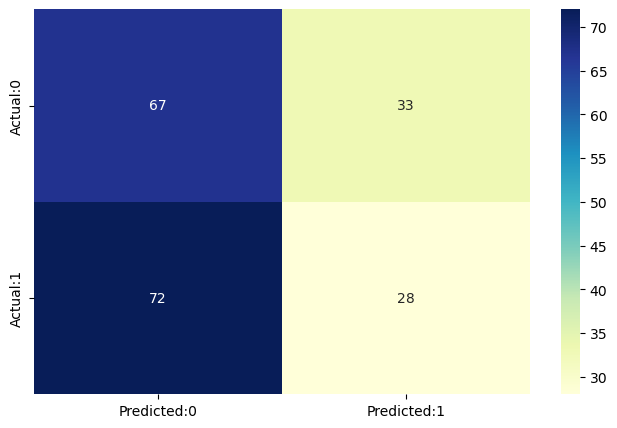

In [149]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## KNN

In [123]:
# fitting our K-nearest neighbour algorithm
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [125]:
# predicting the test set
y_pred2 = knn.predict(x_test)

In [127]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51       100
           1       0.50      0.48      0.49       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



In [129]:
print(accuracy_score(y_test,y_pred2))

0.5


In [161]:
print(precision_score(y_test,y_pred2))

0.5


In [173]:
print(recall_score(y_test,y_pred2))

0.48


<Axes: >

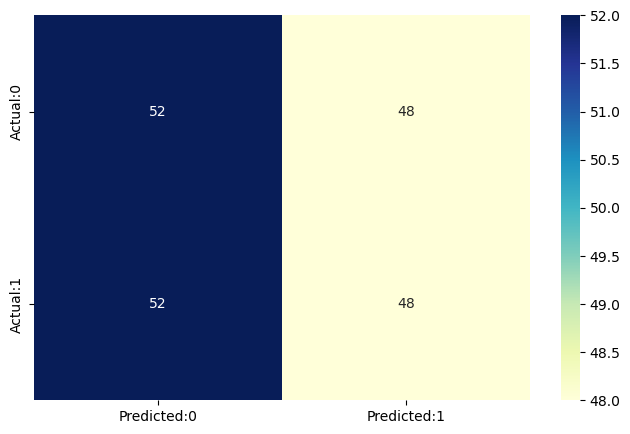

In [151]:
cm=confusion_matrix(y_test,y_pred2)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## Decision Trees

In [131]:
# fitting the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [133]:
# predicting the test set
y_pred3 = dtc.predict(x_test)

In [135]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54       100
           1       0.50      0.41      0.45       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



In [137]:
print(accuracy_score(y_test,y_pred3))

0.5


In [163]:
print(precision_score(y_test,y_pred3))

0.5


In [175]:
print(recall_score(y_test,y_pred3))

0.41


<Axes: >

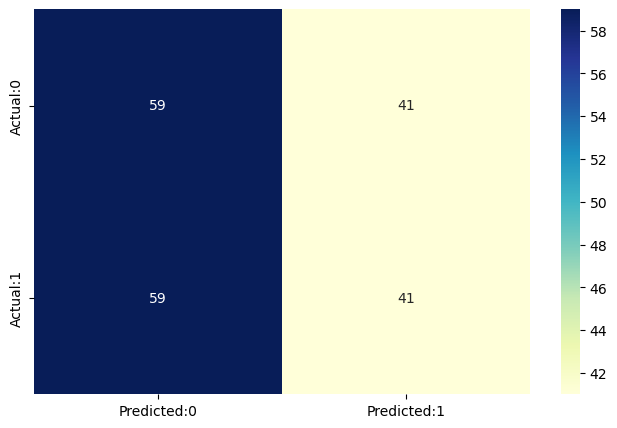

In [153]:
cm=confusion_matrix(y_test,y_pred3)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## Random Forest

In [141]:
# fitting the Random forest classifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [143]:
# predicting the test set
y_pred4 = rfc.predict(x_test)

In [145]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.52      0.59      0.55       100
           1       0.52      0.45      0.48       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200



In [147]:
print(accuracy_score(y_test,y_pred4))

0.52


In [157]:
print(precision_score(y_test,y_pred4))

0.5232558139534884


In [169]:
print(recall_score(y_test,y_pred4))

0.45


<Axes: >

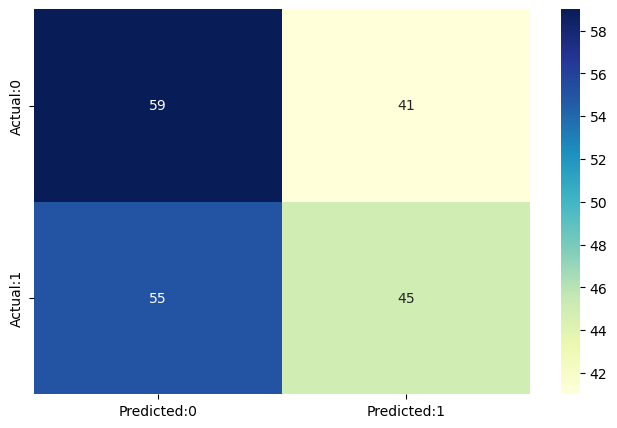

In [155]:
cm=confusion_matrix(y_test,y_pred4)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Model Evaluation

### Results of the performance of the models using accuracy, precision and recall metrics

In [179]:
# Dictionary to hold model names and predictions
models = {
    'Logistic Regression': y_pred,
    'KNN': y_pred2,
    'Decision Tree': y_pred3,
    'Random Forest': y_pred4
}

# Initialize list for performance results
results = []

for name, preds in models.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    results.append({
        'Model': name,
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2)
    })

results_df = pd.DataFrame(results)


In [181]:
results_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.47,0.46,0.28
1,KNN,0.50,0.50,0.48
2,Decision Tree,0.50,0.50,0.41
3,Random Forest,0.52,0.52,0.45


# Why Accuracy, Precision, and Recall?

### The best model turned out to be Random forest based on the performance scores in the table above
### The dataset is balanced (49% Approved, 51% Denied) — so accuracy is meaningful. But accuracy alone can be misleading if the model is making bad decisions on key classes (i.e, predicting a risky borrower as eligible).

## That’s why I also used precision and recall:

### Precision (0.52): Shows that when the model predicts Approved, it's correct 52% of the time. This is important to minimize bad loans (false positives).

### Recall (0.45): Indicates the model identified 45% of actually eligible applicants. Important to not miss good customers (false negatives).

# Interpretation of Feature Importances:

### All correlation values are close to zero, indicating weak linear relationships between individual features and the loan outcome. This suggests that no single feature dominates the decision-making — the model likely benefits more from complex interactions between variables than from any one predictor.

# Most Significant Features:

### Despite weak correlations, the highest absolute values (though still small) are:

### Debt-to-Income (0.031) → Slight positive correlation: higher DTI slightly increases approval odds.

### Self-employed (0.022) → Weak positive influence: self-employed applicants may be marginally more favored.

### Annual Income (-0.045) → Weak negative correlation: surprisingly, higher income slightly lowers approval odds (may indicate nonlinear effects or other interactions).

### These features, although weak individually, may still play a combined role in complex model structures like Random Forests.

# Risk Factor Insights:

### LoanAmount (-0.023) and Unemployed (-0.029) both show negative correlations, suggesting larger loans and unemployment reduce approval chances.

### Credit Score (-0.0081) has an unexpectedly weak negative link — may indicate that either:

### It's not properly scaled/standardized, Or other features override its importance in the model.

### Loan-to-Income (-0.00011) has almost no correlation, indicating it's not useful alone, though it might matter in feature interactions.